<a href="https://colab.research.google.com/github/jmabe01/machine-learning/blob/main/Jordyn_Mabe_801186783_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(569, 30)
Accuracy: 0.9415204678362573
Precision: 0.9454545454545454
Recall: 0.9629629629629629


Text(0.5, 427.9555555555555, 'Predicted')

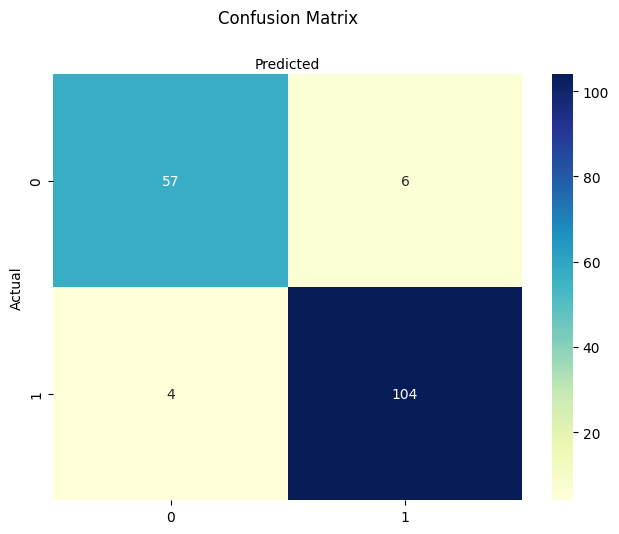

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

#Problem1: Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and 
#recall. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, Y_train)

Y_Pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_Pred))
print("Precision:", metrics.precision_score(Y_test, Y_Pred))
print("Recall:", metrics.recall_score(Y_test, Y_Pred))

cnfm = confusion_matrix(Y_test, Y_Pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnfm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

(569, 30)
K= 1
Accuracy: 0.9035%
Precision: 0.8611%
Recall: 0.9841%

K= 2
Accuracy: 0.9561%
Precision: 0.9726%
Recall: 0.9595%

K= 3
Accuracy: 0.9561%
Precision: 0.9487%
Recall: 0.9867%

K= 4
Accuracy: 0.9561%
Precision: 0.9342%
Recall: 1.0000%

K= 5
Accuracy: 0.9649%
Precision: 0.9620%
Recall: 0.9870%

K= 6
Accuracy: 0.9561%
Precision: 0.9459%
Recall: 0.9859%

K= 7
Accuracy: 0.9649%
Precision: 0.9610%
Recall: 0.9867%

K= 8
Accuracy: 1.0000%
Precision: 1.0000%
Recall: 1.0000%

K= 9
Accuracy: 0.9825%
Precision: 0.9714%
Recall: 1.0000%

K= 10
Accuracy: 0.9561%
Precision: 0.9474%
Recall: 0.9863%

K= 11
Accuracy: 0.9737%
Precision: 0.9583%
Recall: 1.0000%

K= 12
Accuracy: 0.9649%
Precision: 0.9429%
Recall: 1.0000%

K= 13
Accuracy: 0.9737%
Precision: 0.9620%
Recall: 1.0000%

K= 14
Accuracy: 0.9561%
Precision: 0.9367%
Recall: 1.0000%

K= 15
Accuracy: 0.9912%
Precision: 0.9865%
Recall: 1.0000%

K= 16
Accuracy: 0.9912%
Precision: 1.0000%
Recall: 0.9877%

K= 17
Accuracy: 0.9649%
Precision: 0.94

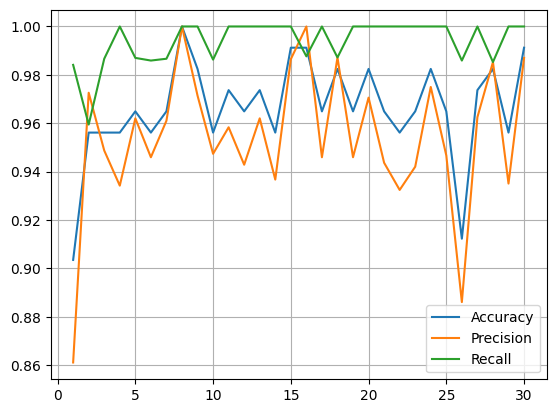

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

#Problem2: Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. 
#Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your 
#classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

accuracy = np.zeros(30)
precision = np.zeros(30)
recall = np.zeros(30)

for K in range(1, 31):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
  pca = PCA(n_components=K)
  X_train_pca = pca.fit_transform(X_train)
  model = LogisticRegression()
  model.fit(X_train_pca, Y_train)
  X_test_pca = pca.transform(X_test)
  Y_Pred = model.predict(X_test_pca)
  accuracy[K-1] = metrics.accuracy_score(Y_test, Y_Pred)
  precision[K-1] = metrics.precision_score(Y_test, Y_Pred)
  recall[K-1] = metrics.recall_score(Y_test, Y_Pred)
  print("K=", K) 
  print("Accuracy: %.4f%%" % accuracy[K-1])
  print("Precision: %.4f%%" % precision[K-1])
  print("Recall: %.4f%%" % recall[K-1])
  print()

plt.figure()
plt.plot(range(1, 31), accuracy)
plt.plot(range(1, 31), precision)
plt.plot(range(1, 31), recall)
plt.grid()
plt.legend(["Accuracy", "Precision", "Recall"])


(569, 30)
K= 1
Accuracy: 0.9386%
Precision: 0.9663%
Recall: 0.9556%

K= 2
Accuracy: 0.9386%
Precision: 0.9275%
Recall: 0.9697%

K= 3
Accuracy: 0.9561%
Precision: 0.9481%
Recall: 0.9865%

K= 4
Accuracy: 0.9298%
Precision: 0.9296%
Recall: 0.9565%

K= 5
Accuracy: 0.9386%
Precision: 0.9714%
Recall: 0.9315%

K= 6
Accuracy: 0.9123%
Precision: 0.9178%
Recall: 0.9437%

K= 7
Accuracy: 0.9035%
Precision: 0.9143%
Recall: 0.9275%

K= 8
Accuracy: 0.9561%
Precision: 0.9552%
Recall: 0.9697%

K= 9
Accuracy: 0.9211%
Precision: 0.9333%
Recall: 0.9459%

K= 10
Accuracy: 0.9211%
Precision: 0.9167%
Recall: 0.9565%

K= 11
Accuracy: 0.9211%
Precision: 0.9028%
Recall: 0.9701%

K= 12
Accuracy: 0.9298%
Precision: 0.9545%
Recall: 0.9265%

K= 13
Accuracy: 0.9474%
Precision: 0.9412%
Recall: 0.9697%

K= 14
Accuracy: 0.9561%
Precision: 0.9481%
Recall: 0.9865%

K= 15
Accuracy: 0.8947%
Precision: 0.9012%
Recall: 0.9481%

K= 16
Accuracy: 0.8947%
Precision: 0.9200%
Recall: 0.9200%

K= 17
Accuracy: 0.9211%
Precision: 0.94

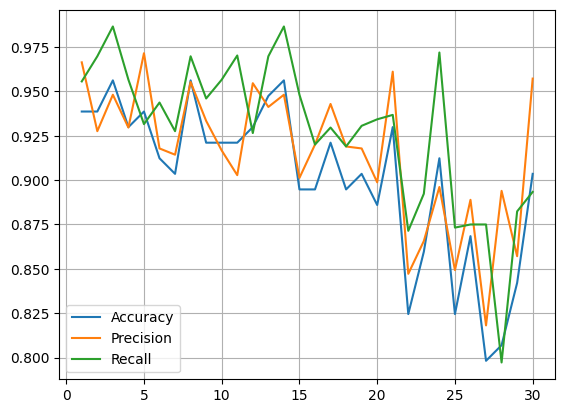

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

#Problem3: Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, and recall). 
#Compare your results against problem 2.

#dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

accuracy = np.zeros(30)
precision = np.zeros(30)
recall = np.zeros(30)

for K in range(1, 31):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
  pca = PCA(n_components=K)
  X_train = pca.fit_transform(X_train)
  model = GaussianNB()
  model.fit(X_train, Y_train)
  X_test_pca = pca.transform(X_test)
  Y_Pred = model.predict(X_test_pca)
  accuracy[K-1] = metrics.accuracy_score(Y_test, Y_Pred)
  precision[K-1] = metrics.precision_score(Y_test, Y_Pred)
  recall[K-1] = metrics.recall_score(Y_test, Y_Pred)
  print("K=", K) 
  print("Accuracy: %.4f%%" % accuracy[K-1])
  print("Precision: %.4f%%" % precision[K-1])
  print("Recall: %.4f%%" % recall[K-1])
  print()

plt.figure()
plt.plot(range(1, 31), accuracy)
plt.plot(range(1, 31), precision)
plt.plot(range(1, 31), recall)
plt.grid()
plt.legend(["Accuracy", "Precision", "Recall"])